# Season Analysis
The analysis carried out so far in [Overview Analysis](Overview%20Analysis.ipynb) and [Sex Analysis](Sex%20Analysis.ipynb) have not shown any links between when someone is born in an Olympic cycle and whether they compete/medal at an Olympics, for the population as a whole nor when considering a person's sex.

Here I am going to consider the individual sports of the Olympics. This is likely to show different results as the age range of Olympic standard performances is likely to vary a lot from sport to sport.
## Table of Contents
- [Data Preparation](#Data-Preparation)
- [Dataset Details](#Dataset-Details)
- [Overall Distribution](#Overall-Distribution)
- [Normalised Age Distribution](#Normalised-Age-Distribution)
 - [All Competitors](#All-Competitors)
 - [Medalists](#Medalists)
 - [Statistical Significance](#Statistical-Significance)
     - [All Competitors]()
     - [Split by Sex](#Split-by-Sex)
- [Longevity](#Longevity)
- [Conclusion](#Conclusion)

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import DataCleaner
%matplotlib inline

In [2]:
# Read in data
athlete_events_df=pd.read_csv("data/athlete_events.csv")
noc_regions_df=pd.read_csv("data/noc_regions.csv",index_col="NOC")

In [3]:
# Clean data (See DataCleaner.py for details)
athlete_df=DataCleaner.clean_athlete_events(athlete_events_df)
noc_df=DataCleaner.clean_noc_regions(noc_regions_df)

In [4]:
# Add Field
athlete_df["Medalist"]=athlete_df["Medal"].isin(["gold","silver","bronze"]) # boolean for whether athlete won a medal
athlete_df["Birth_Year"]=athlete_df["Year"]-athlete_df["Age"]

In [5]:
# Group data such that each athlete only has one entry
unique_athlete_df=DataCleaner.unique_athlete(athlete_df)
unique_athlete_df.head()

C:\Users\domah\Documents\Code\Olympic-Analysis\DataCleaner.py:117: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  athlete_details=athlete_df.groupby(by="Athlete_ID")["Name","Sex","NOC","Season","Sport","Birth_Year"].first()
C:\Users\domah\Documents\Code\Olympic-Analysis\DataCleaner.py:118: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unique_details=athlete_df.groupby(by="Athlete_ID")["Event","Year"].agg(['unique'])
c:\users\domah\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Name,Sex,NOC,Season,Sport,Birth_Year,Num_Medals,Events,Years,Median_Age,Medalist
Athlete_ID,,,,,,,,,,,
2,a lamusi,M,chn,summer,judo,1989.0,0,[extra-lightweight],[2012],23,False
5,christine jacoba aaftink,F,ned,winter,speed skating,1967.0,0,"[500 metres, 1,000 metres]","[1988, 1992, 1994]",25,False
6,per knut aaland,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False
7,john aalberg,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False
10,"einar ferdinand ""einari"" aalto",M,fin,summer,swimming,1926.0,0,[400 metres freestyle],[1952],26,False


# Dataset Details

In [6]:
print("`athlete_df` contains {:,} entries.".format(athlete_df.shape[0]))
summer_games=athlete_df[athlete_df["Season"]=="summer"]
winter_games=athlete_df[athlete_df["Season"]=="winter"]
print("\t{:,} athletes".format(len(athlete_df["Athlete_ID"].unique())))
print("\t{:,} medals".format(athlete_df["Athlete_ID"].notnull().sum()))
print("\t{} summer games ({}-{}).".format(len(summer_games["Year"].unique()),summer_games["Year"].min(),summer_games["Year"].max()))
print("\t{} winter games ({}-{}).".format(len(winter_games["Year"].unique()),winter_games["Year"].min(),winter_games["Year"].max()))
print("\t{} sports ({} summer, {} winter).".format(len(athlete_df["Sport"].unique()),len(summer_games["Sport"].unique()),len(winter_games["Sport"].unique())))
print("\t{} events ({} summer, {} winter).\n".format(len(athlete_df["Event"].unique()),len(summer_games["Event"].unique()),len(winter_games["Event"].unique())))


`athlete_df` contains 200,969 entries.
	91,562 athletes
	200,969 medals
	18 summer games (1948-2016).
	18 winter games (1948-2014).
	41 sports (27 summer, 14 winter).
	278 events (221 summer, 67 winter).



# Overall Distribution
The boxplot below shows the age distribution for each sport. The sports are order by median age, in increasing order.

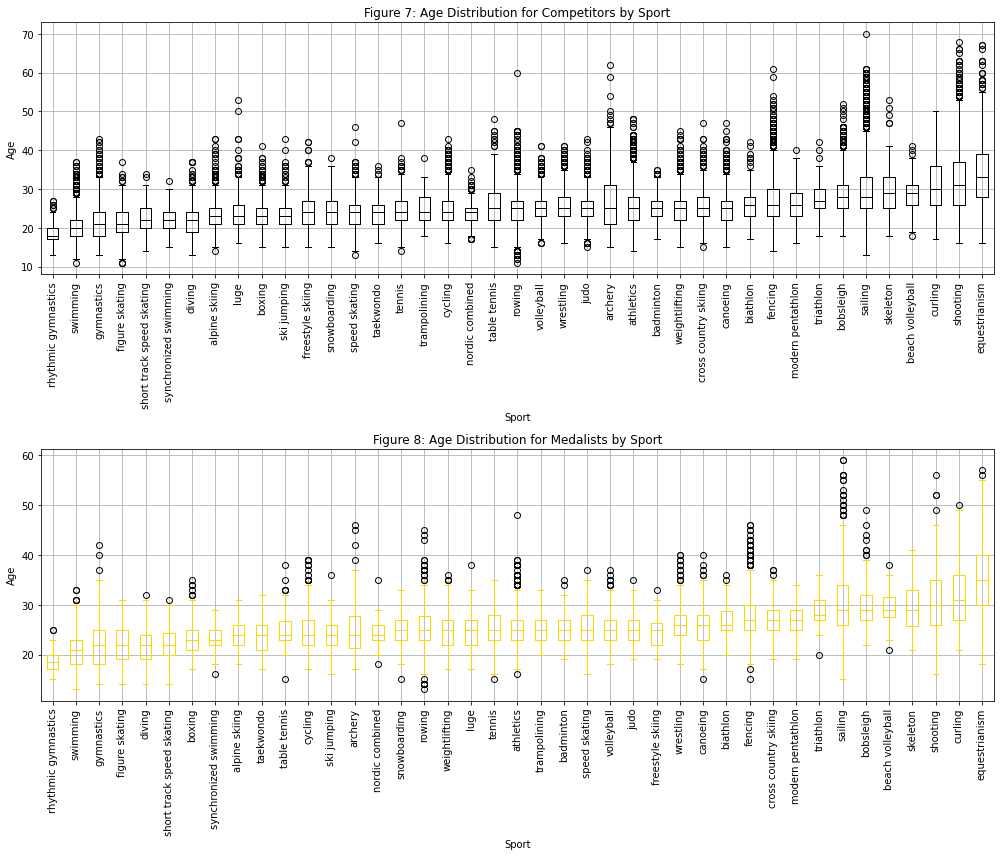

In [20]:
def boxplot_sorted(df,by,column,ax,colour):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()
    bp=df2[meds.index].boxplot(ax=ax,color=dict(boxes=colour, whiskers=colour, medians=colour, caps=colour))
    return enumerate(meds.index) # sorted order

fig,(ax0,ax1)=plt.subplots(figsize=(14,12),nrows=2,ncols=1,tight_layout=True)

# plot medalists
boxplot_sorted(unique_athlete_df[["Sport","Median_Age"]],by="Sport",column="Median_Age",ax=ax0,colour="black")
ax0.set_title("Figure 7: Age Distribution for Competitors by Sport")
ax0.set_xlabel("Sport")
ax0.set_ylabel("Age")
ax0.xaxis.set_tick_params(rotation=90)

boxplot_sorted(unique_athlete_df[unique_athlete_df["Medalist"]][["Sport","Median_Age"]],by="Sport",column="Median_Age",ax=ax1,colour="gold")
ax1.set_title("Figure 8: Age Distribution for Medalists by Sport")
ax1.set_xlabel("Sport")
ax1.set_ylabel("Age")
ax1.xaxis.set_tick_params(rotation=90)

The majority of athletes in each sport are in their early to mid 20s, as to be expected from *Figure 1*. The sports with typically older athletes (curling, shooting, equiestrian) are more skill based, rather than physical, which will favour older athletes.

*Rowing* has an interesting quirk as it was not uncommon in the early Olympics for coxes to be very young (in some cases not even teenagers) due to the weight advantage they offered.

# Normalised Age Distribution

In [8]:
# Determine how many years after an olympics an athlete was born
# This is complicated by the fact that the summer & winter games were in sync until 1994
def add_cycle_age(df:pd.DataFrame) -> pd.DataFrame:
    if ("Cycle_Age" in df.columns): return df
    summer_athletes=(df["Season"]=="summer")
    pre_change_winter_athletes=((df["Season"]=="winter") & (df["Birth_Year"]<1994))
    post_change_winter_athletes=((df["Season"]=="winter") & (df["Birth_Year"]>=1994))

    df.loc[summer_athletes,"Cycle_Age"]=(df.loc[summer_athletes,"Birth_Year"]%4)
    df.loc[pre_change_winter_athletes,"Cycle_Age"]=(df.loc[pre_change_winter_athletes,"Birth_Year"]%4)
    df.loc[post_change_winter_athletes,"Cycle_Age"]=((df.loc[post_change_winter_athletes,"Birth_Year"]-2)%4)
    
    return df
unique_athlete_df=add_cycle_age(unique_athlete_df)

unique_athlete_df.head()

,Name,Sex,NOC,Season,Sport,Birth_Year,Num_Medals,Events,Years,Median_Age,Medalist,Cycle_Age
Athlete_ID,,,,,,,,,,,,
2,a lamusi,M,chn,summer,judo,1989.0,0,[extra-lightweight],[2012],23,False,1.0
5,christine jacoba aaftink,F,ned,winter,speed skating,1967.0,0,"[500 metres, 1,000 metres]","[1988, 1992, 1994]",25,False,3.0
6,per knut aaland,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False,1.0
7,john aalberg,M,usa,winter,cross country skiing,1961.0,0,"[10 kilometres, 50 kilometres, 10/15 kilometre...","[1992, 1994]",32,False,1.0
10,"einar ferdinand ""einari"" aalto",M,fin,summer,swimming,1926.0,0,[400 metres freestyle],[1952],26,False,2.0


## All Competitors

In [9]:
# plot normalised age distribution (excluding given sports)
def plot_data(df,ax,notable_sports,removed_sports,xlims,ylims,title):
    for sport,group in df.groupby("Sport"):
        if (sport in removed_sports): continue

        (color,alpha)=(notable_sports[sport],1) if (sport in notable_sports) else ("gray",.3)
        label="{} (n={:,})".format(sport,group.shape[0])
        group["Cycle_Age"].value_counts(normalize=True).sort_index().plot(ax=ax,label=label,color=color,alpha=alpha,xlim=xlims,ylim=ylims)

        ax.axhline(y=.25,xmin=.125,xmax=.875,color="black",ls="--")
        ax.set_xlabel("Normalised Age")
        ax.set_xticks([0,1,2,3])
        ax.set_ylabel("Proportion of Competitors")
        ax.set_title(title,position=(0.5,0.9))

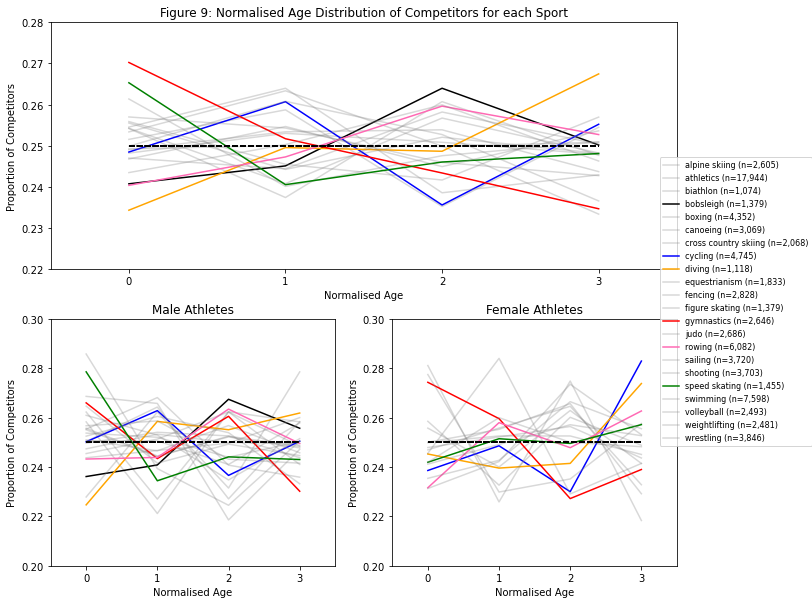

In [21]:
# prepare figure for plots (2x2 with top double wide)
fig=plt.figure(figsize=(12,10))
gs=fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,:])
ax10=fig.add_subplot(gs[1,0])
ax11=fig.add_subplot(gs[1,1])

# prepare details of plots
notable_sports={"bobsleigh":"black",
                "diving":"orange",
                "gymnastics":"red",
                "rowing":"hotpink",
                "speed skating":"green",
                "cycling":"blue"}
xlims=(-.5,3.5)

# plot sports with atleast 1000 athletes
removed_sports=(unique_athlete_df["Sport"].value_counts().loc[lambda x:x<1000].index.to_list())
plot_data(unique_athlete_df,ax0,notable_sports,removed_sports,xlims,(.22,.28),"Figure 9: Normalised Age Distribution of Competitors for each Sport")

# plot male data with atleast 500 male athletes
removed_sports=(unique_athlete_df[unique_athlete_df["Sex"]=="M"]["Sport"].value_counts().loc[lambda x:x<500].index.to_list())
plot_data(unique_athlete_df[unique_athlete_df["Sex"]=="M"],ax10,notable_sports,removed_sports,xlims,(.2,.3),"Male Athletes")

# plot female data with atleast 500 female athletes
removed_sports=(unique_athlete_df[unique_athlete_df["Sex"]=="F"]["Sport"].value_counts().loc[lambda x:x<500].index.to_list())
plot_data(unique_athlete_df[unique_athlete_df["Sex"]=="F"],ax11,notable_sports,removed_sports,xlims,(.2,.3),"Female Athletes")

# stylise plot
handles,labels=ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',borderaxespad=0.1,prop={'size': 8})
plt.subplots_adjust(right=.85)

plt.show()

This plot shows no consistant pattern across all sports, which would explain why no patterns were found when looking at the populations as a whole. Discrepancies from the expected uniform distribution are still only a few percent, but are significantly greater than when observing the whole population.

I have highlighted some of the sports with the most extreme apparent deviations from a uniform distribution. Gymnastics has a consistant decrease in athletes the longer after an olympics they were born (even more extreme among Female athletes), while diving has almost a mirrored distribution. These are similar sports due to their high technique & strength requirements, which likely causes them to have a shorted optimal window to compete in. Both sports are also notable for having many younger athletes.

Bobsleigh & rowing appear to favour those born towards the end of an Olympic cycle. Wheras speed skating  favour thoses born at the beginning.

Interestingly these patterns do not seem consistent when accounting for an Athletes gender. Although in some sports the nature of the male & female events are very different. Namely, male gymnastics has a much greater strength element than female gymnastics.

I will now create the same plot but for medalists only.

## Medalists

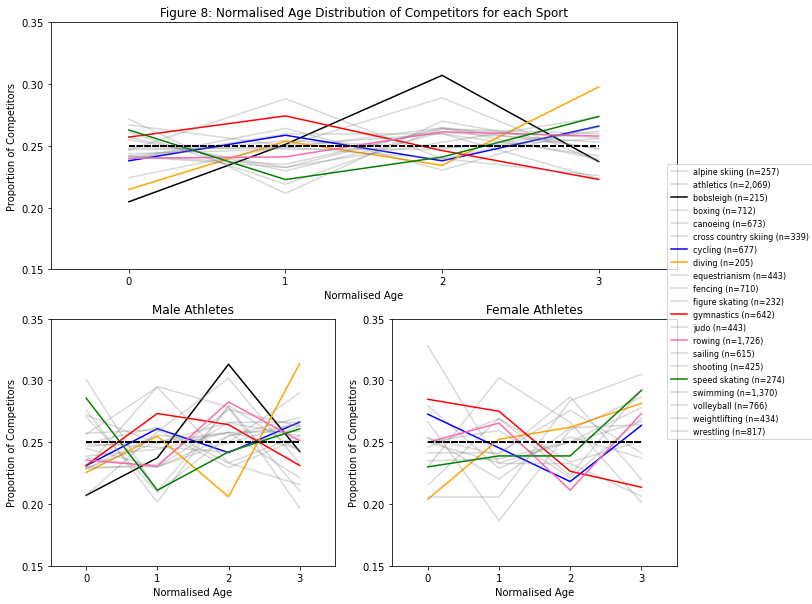

In [11]:
# prepare figure for plots (2x2 with top double wide)
fig=plt.figure(figsize=(12,10))
gs=fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,:])
ax10=fig.add_subplot(gs[1,0])
ax11=fig.add_subplot(gs[1,1])

# prepare details of plots
notable_sports={"bobsleigh":"black",
                "diving":"orange",
                "gymnastics":"red",
                "rowing":"hotpink",
                "speed skating":"green",
                "cycling":"blue"}
xlims=(-.5,3.5)

medalists=unique_athlete_df[unique_athlete_df["Medalist"]]
# plot sports with atleast 1000 athletes
removed_sports=(medalists["Sport"].value_counts().loc[lambda x:x<200].index.to_list())
plot_data(medalists,ax0,notable_sports,removed_sports,xlims,(.15,.35),"Figure 10: Normalised Age Distribution of Competitors for each Sport")

# plot male data with atleast 500 male athletes
removed_sports=(medalists[medalists["Sex"]=="M"]["Sport"].value_counts().loc[lambda x:x<100].index.to_list())
plot_data(medalists[medalists["Sex"]=="M"],ax10,notable_sports,removed_sports,xlims,(.15,.35),"Male Athletes")

# plot female data with atleast 500 female athletes
removed_sports=(medalists[medalists["Sex"]=="F"]["Sport"].value_counts().loc[lambda x:x<100].index.to_list())
plot_data(medalists[medalists["Sex"]=="F"],ax11,notable_sports,removed_sports,xlims,(.15,.35),"Female Athletes")

for ax in [ax0,ax10,ax11]: ax.set_yticks([.15,.2,.25,.3,.35])

handles,labels=ax0.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',borderaxespad=0.1,prop={"size":8})
plt.subplots_adjust(right=.85)
plt.show()

Again there is no overal pattern across all sports, but the discrepancies from the expected uniformity are greater. And, there is not obvious similarity in the distributions for Male and Female athletes from the same sport.

I have highlighted six notable distributions. Four of them are the same as in the *Figure 9* (bobsleigh,diving,gymnastics,rowing), each broadly follows the same pattern as in *Figure 9* which is to be partly expected if each athlete has a similar chance of winning a medal (which is debatable).

Aditionally, I have highlighted weightlifting & figure skating as signifcantly less of their medalists are born in the years immediately before or after an Olympics.

## Statistical Significance

In [12]:
from scipy.stats import chisquare

In [13]:
# check the normalised distribution for each sport (competitors & medalists).
# produce grid of booleans with whether statistically significant or not.
def chisquare_uniform(df,col="Cycle_Age",print_vals=True) -> (float,float):
    f_obs=df[col].value_counts().sort_index().values
    f_exp=np.repeat(sum(f_obs)/len(f_obs),len(f_obs))
    if print_vals: print("Observed occs: {}.\nExpected occs: {}".format(f_obs,f_exp))
    chi,p_value=chisquare(f_obs,f_exp)
    return chi,p_value

# perform chisquare_uniform on a given dataframe (provided it has enough rows)
def perform_test(df:pd.DataFrame,min_rows):
    if (df.shape[0]<min_rows): return None
    chi,p_value=chisquare_uniform(df,print_vals=False)
    return p_value>.1

# colour cells to make table more readale
def highlight_values(val):
    dic={True:"green",False:"red"}
    color=dic[val] if (val in dic) else "black"
    return 'color: %s' % color

## All Competitors

In [14]:
chisquare_df=pd.DataFrame(columns=["Competitors are Uniform","Medalists are Uniform"])
for sport,group in unique_athlete_df.groupby("Sport"):
    medalists=group[group["Medalist"]]
    series=pd.Series()
    series.name=sport
    append=False
    
    series["Competitors are Uniform"]=perform_test(group,1000)
    series["Medalists are Uniform"]=perform_test(medalists,200)
        
    if (series.count()>0): chisquare_df=chisquare_df.append(series)
        
chisquare_df.style.applymap(highlight_values)

c:\users\domah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,Competitors are Uniform,Medalists are Uniform
alpine skiing,True,True
athletics,True,True
biathlon,True,None
bobsleigh,True,True
boxing,True,True
canoeing,True,True
cross country skiing,True,True
cycling,False,True
diving,True,True
equestrianism,True,True


Only two of the distributions have sufficient statistical evidence for not being uniform: Cycling competitors and Gymnastics competitors. This is fewer than expected after evaluating the *Figure 9* and *Figure 10*.

I am now going to investigate whether theses sports have a particularly short optimal age range.

## Split by Sex

In [15]:
chisquare_df=pd.DataFrame(columns=["Male Competitors are Uniform","Male Medalists are Uniform","Female Competitors are Uniform","Female Medalists are Uniform"])
for sport,group in unique_athlete_df.groupby("Sport"):
    male_competitors=group[group["Sex"]=="M"]
    female_competitors=group[group["Sex"]=="F"]
    male_medalists=group[group["Medalist"] & (group["Sex"]=="M")]
    female_medalists=group[group["Medalist"] & (group["Sex"]=="F")]
    series=pd.Series()
    series.name=sport
    
    series["Male Competitors are Uniform"]=perform_test(male_competitors,500)
    series["Female Competitors are Uniform"]=perform_test(female_competitors,500)
    series["Male Medalists are Uniform"]=perform_test(male_medalists,100)
    series["Female Medalists are Uniform"]=perform_test(female_medalists,100)
    
    if (series.count()>0): chisquare_df=chisquare_df.append(series)
        
chisquare_df.style.applymap(highlight_values)

c:\users\domah\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


,Male Competitors are Uniform,Male Medalists are Uniform,Female Competitors are Uniform,Female Medalists are Uniform
alpine skiing,True,True,True,True
archery,True,None,None,None
athletics,True,True,True,True
biathlon,True,True,None,None
bobsleigh,True,True,None,None
boxing,True,True,None,None
canoeing,False,True,True,True
cross country skiing,True,True,True,True
cycling,True,True,True,True
diving,True,True,True,True


When considering an athletes sex, as well as their sport, a lesser proportion of non-uniform distributions are found. Notable non-uniform distributions found here but not when considering all athletes are: Female Fencers (competitors & medalists); Male Rowing Medalists; Male Conoeing compeitors; And, Male Sailing Medalists.

Interestingly, cycling competitors showed as having a non-uniform distribution when combining Male & Female athletes but neither do when considered separetly. This likely indicates an insufficient sample size.

# Longevity

Here I am going to evaluate the longevity of athletes in different sports. Sports where athletes have shorter careers are likely to have a greater turnover in athletes. Obviously many things affect the longevity of an athletes career including how competive/professional their chosen sport is.

In [16]:
unique_athlete_df["Num_Olympics"]=unique_athlete_df["Years"].apply(lambda x:len(x))

Text(0, 0.5, 'Proportion of Competitors')

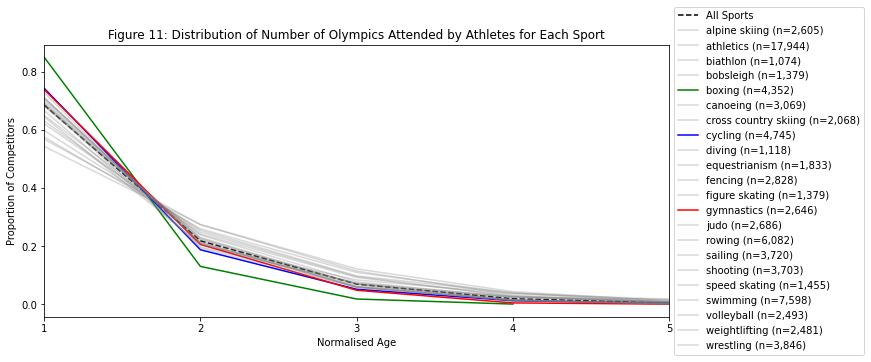

In [18]:
fig,axes=plt.subplots(figsize=(14,5),nrows=1,ncols=1)

unique_athlete_df["Num_Olympics"].value_counts(normalize=True).plot(ax=axes,label="All Sports",xlim=(1,10),color="black",ls="--")

notable_sports={"gymnastics":"red",
                "cycling":"blue",
                "boxing":"green"}

for sport,group in unique_athlete_df.groupby("Sport"):
    if (group.shape[0]<1000): continue
    
    (color,alpha)=(notable_sports[sport],1) if (sport in notable_sports) else ("gray",.3)
    label="{} (n={:,})".format(sport,group.shape[0])
    group["Num_Olympics"].value_counts(normalize=True).sort_index().plot(ax=axes,label=label,color=color,alpha=alpha)

# Make plot smaller so can place a legend to the right of the current axis
box=axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_title("Figure 11: Distribution of Number of Olympics Attended by Athletes for Each Sport")
axes.set_xlabel("Normalised Age")
axes.set_xlim((1,5))
axes.set_xticks(range(1,6))
axes.set_ylabel("Proportion of Competitors")

*Figure 10* shows that gymnasts and cyclists have the second and third shortest olympic careers of any sports (with boxing have the shortest by a notable margin).

Considering *Figure 7* which shows gymnasts to be the third youngest group of competitors, when you are born in an olympic cycle will have the greatest affect on your chance of becoming an Olympic gymnast (out of all the sports).

# Conclusions
There is very little evidence that when you are born in an Olympic Cycle affects your chance of becoming an Olympic Athlete and almost certainly has no affect on the majority of sports.

However, considering *Figure 7* showing gymnasts to be the third youngest group of competitors; *Figure 11* showing gymnasts to have the second shorts longevity in the Olympics; and that the normalised age distribution of female gymnasts is non-uniform suggests that being born at the start of an Olympic cycle has the greatest affect (likely a tangible one) on becoming an Olympic gymnast.